In [8]:
import h5py
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, Dense, Dropout, BatchNormalization, MaxPooling2D, Activation, Flatten
from keras.utils import to_categorical
from keras import backend as K
import matplotlib.pyplot as plt

K.set_image_dim_ordering( 'tf' )

with h5py.File('X.h5', 'r') as hf:
    X = hf['X_h5'][:]

with h5py.File('y.h5', 'r') as hf:
    y = hf['y_h5'][:]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True)

X_train = X_train.reshape(X_train.shape[0], 160, 120, 1)
X_test= X_test.reshape(X_test.shape[0], 160, 120, 1)
y_train = to_categorical(y_train).astype('int32')
y_test = to_categorical(y_test).astype('int32')

print(" 'X' matrix/input ")
print(X_train.shape)
print(X_train[0][0], '\n')
print(" 'y' label/output ")
print(y_train.shape)
print(y_train)

/home/tmbluth/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


 'X' matrix/input 
(17939, 160, 120, 1)
[[ 0.20392157]
 [ 0.20392157]
 [ 0.20392157]
 [ 0.21568628]
 [ 0.20784314]
 [ 0.20392157]
 [ 0.20784314]
 [ 0.20784314]
 [ 0.21176471]
 [ 0.23137255]
 [ 0.26274511]
 [ 0.29019609]
 [ 0.31764707]
 [ 0.30980393]
 [ 0.29411766]
 [ 0.3137255 ]
 [ 0.33725491]
 [ 0.30588236]
 [ 0.28627452]
 [ 0.27450982]
 [ 0.26666668]
 [ 0.25098041]
 [ 0.23137255]
 [ 0.22352941]
 [ 0.21568628]
 [ 0.20392157]
 [ 0.19607843]
 [ 0.19607843]
 [ 0.2       ]
 [ 0.21960784]
 [ 0.24313726]
 [ 0.29019609]
 [ 0.40784314]
 [ 0.66274512]
 [ 0.58823532]
 [ 0.15686275]
 [ 0.22352941]
 [ 0.64313728]
 [ 0.32156864]
 [ 0.78039217]
 [ 0.99607843]
 [ 0.98431373]
 [ 0.99215686]
 [ 0.99607843]
 [ 0.99607843]
 [ 0.99607843]
 [ 0.99607843]
 [ 0.99607843]
 [ 0.99215686]
 [ 0.99215686]
 [ 0.99215686]
 [ 0.99215686]
 [ 0.99215686]
 [ 0.99215686]
 [ 0.99215686]
 [ 0.99215686]
 [ 0.99215686]
 [ 0.99215686]
 [ 0.99215686]
 [ 0.99215686]
 [ 0.99215686]
 [ 0.99215686]
 [ 0.99215686]
 [ 0.99215686]


In [11]:
early_stop = [EarlyStopping(monitor = 'val_loss', patience = 3)]

def DD_model():
### YOUR TURN
    # Using the same architecture above, 
    # except that the orders of a batchnormalization layer and a activation layer are reversed, 
    # build a model and test if the claim above is true.
    model = Sequential()
    # Use Batch Normalization for every conv and dense layers
    model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', input_shape = (160, 120, 1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    # Use dropout layers if you like
    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.33))
    model.add(Dense(32, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation = 'softmax'))
    # Use Adam optimizer
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

driver_model = DD_model()
driver_hist = driver_model.fit(X_train, y_train, epochs = 10, batch_size = 32,
                               validation_split=0.2, callbacks=early_stop, verbose = 2)

Train on 14351 samples, validate on 3588 samples
Epoch 1/10
 - 260s - loss: 0.9693 - acc: 0.7068 - val_loss: 0.3147 - val_acc: 0.9086
Epoch 2/10
 - 254s - loss: 0.1652 - acc: 0.9626 - val_loss: 0.1146 - val_acc: 0.9607
Epoch 3/10
 - 254s - loss: 0.0771 - acc: 0.9811 - val_loss: 0.0999 - val_acc: 0.9696
Epoch 4/10
 - 256s - loss: 0.0548 - acc: 0.9862 - val_loss: 0.0332 - val_acc: 0.9916
Epoch 5/10
 - 257s - loss: 0.0371 - acc: 0.9898 - val_loss: 0.0872 - val_acc: 0.9713
Epoch 6/10
 - 255s - loss: 0.0362 - acc: 0.9900 - val_loss: 0.0692 - val_acc: 0.9808
Epoch 7/10
 - 254s - loss: 0.0518 - acc: 0.9831 - val_loss: 0.0530 - val_acc: 0.9869


In [13]:
driver_model.save('./driver_model.h5')
# load_model('./driver_model.h5')

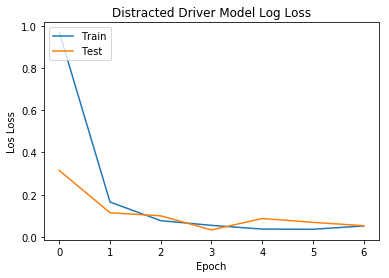

In [14]:
def plot_loss(model_hist, metric_1, metric_2):
    plt.plot(model_hist.history[metric_1])
    plt.plot(model_hist.history[metric_2])
    plt.title('Distracted Driver Model Log Loss')
    plt.ylabel('Los Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

plot_loss(driver_hist, 'loss', 'val_loss')